# Visualize Training 

> Joseph P. Vantassel, The University of Texas at Austin

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
from plot import view_state_and_utility

In [2]:
# Input
p1 = 1
p2 = 2
nsimulation = 10000
file_name_p1 = "pre_trained_sets/training_p1_"+str(nsimulation)
file_name_p2 = "pre_trained_sets/training_p2_"+str(nsimulation)
file_name_lc = "pre_trained_sets/lc_"+str(nsimulation)

# Load previous training sets
boards_played={}
fnames = {p1:file_name_p1, p2:file_name_p2}
for player in (p1, p2):
    with open(fnames[player], "rb") as f:
        boards_played[player] = pickle.load(f)

## Plot Learning Curve

Player 1 won 58.4% of the games.
Player 2 won 29.1% of the games.
The game was tied 12.4% of the games.



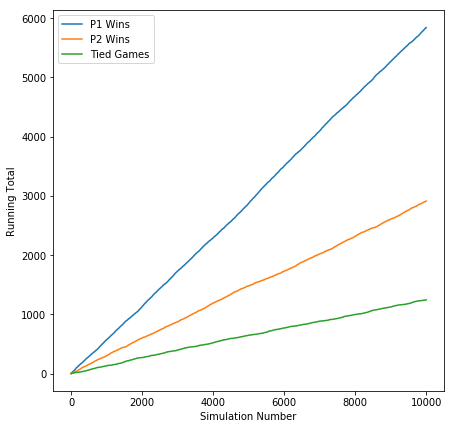

In [3]:
# Load learning curve
with open(file_name_lc, "rb") as f:
    training = pickle.load(f)
    
p1_hist = [0]
p2_hist = [0]
ti_hist = [0]
for winner in training:
    if winner is 1:
        p1_hist += [p1_hist[-1] + 1]
        p2_hist += [p2_hist[-1]]
        ti_hist += [ti_hist[-1]]
    elif winner is 2:
        p2_hist += [p2_hist[-1] + 1]
        p1_hist += [p1_hist[-1]]
        ti_hist += [ti_hist[-1]]
    else:
        ti_hist += [ti_hist[-1] + 1]
        p1_hist += [p1_hist[-1]]
        p2_hist += [p2_hist[-1]]
       
print(f"Player 1 won {np.round(p1_hist[-1]/len(training)*100,1)}% of the games.")
print(f"Player 2 won {np.round(p2_hist[-1]/len(training)*100,1)}% of the games.")
print(f"The game was tied {np.round(ti_hist[-1]/len(training)*100,1)}% of the games.")
print()    
    
fig = plt.figure(figsize=(7,7))
plt.plot(p1_hist, label="P1 Wins")
plt.plot(p2_hist, label="P2 Wins")
plt.plot(ti_hist, label="Tied Games")
plt.xlabel("Simulation Number")
plt.ylabel("Running Total")
plt.legend()
plt.show()

## Board State and Utility for Player 1 (X's)

10 of 622 boards plotted.


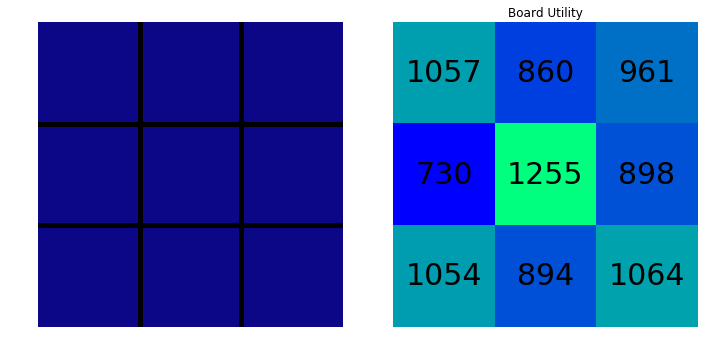

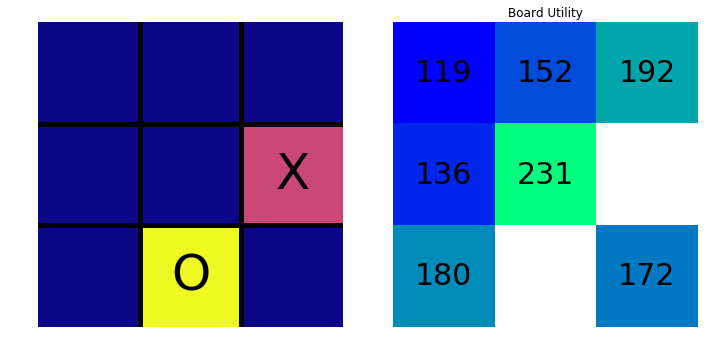

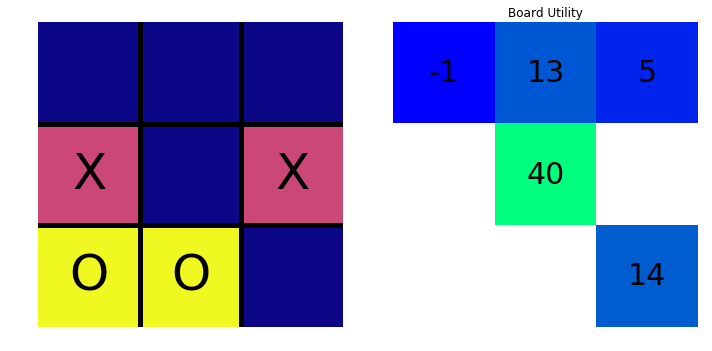

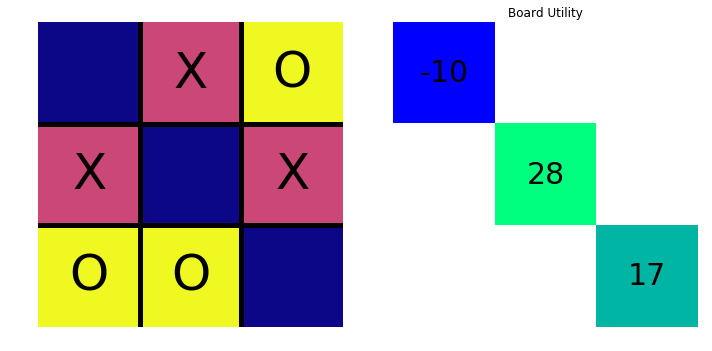

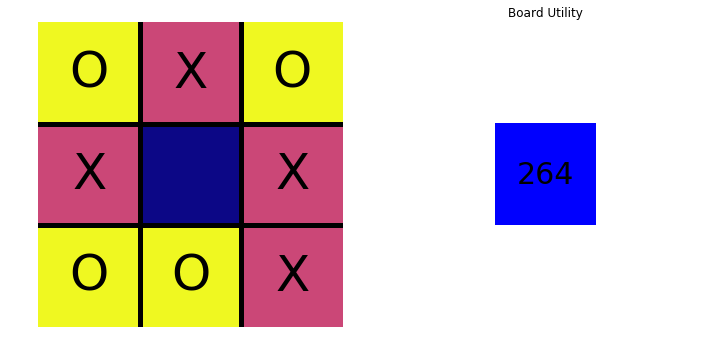

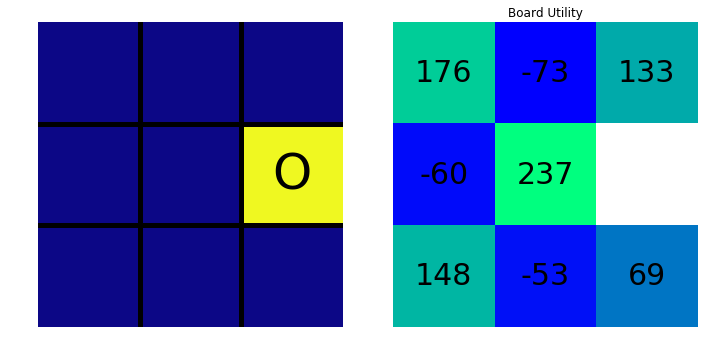

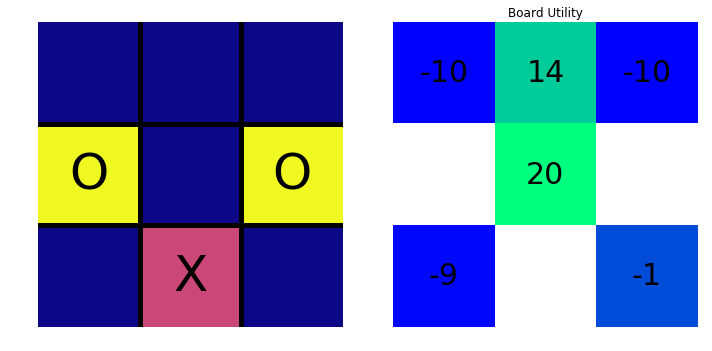

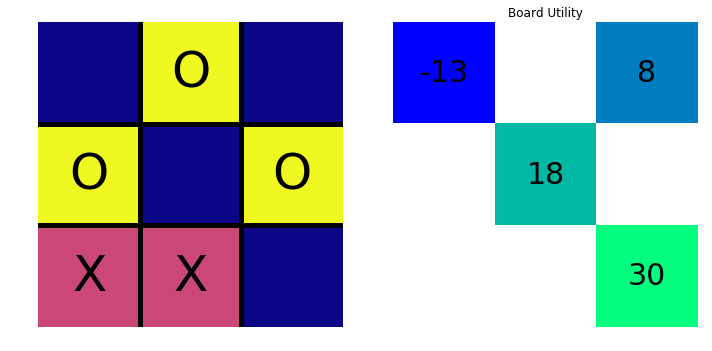

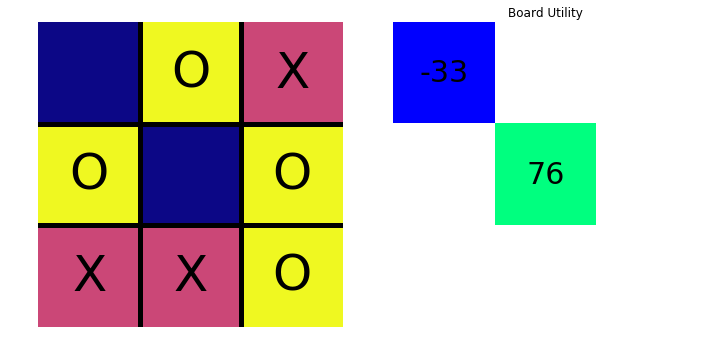

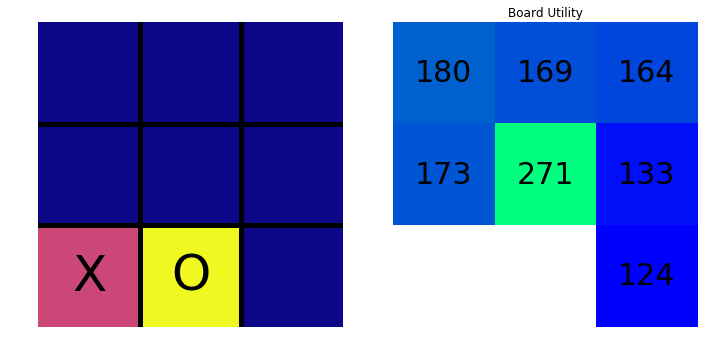

In [8]:
# Control number of boards plotted
board_count = 10

print(f"{board_count} of {len(boards_played[p1].keys())} boards plotted.")
for c_num, (state, utility) in enumerate(boards_played[p1].items(), start=1):
    view_state_and_utility(state, utility)
    if c_num == board_count:
        break

## Board State and Utility for Player 2 (O's)

10 of 614 boards plotted.


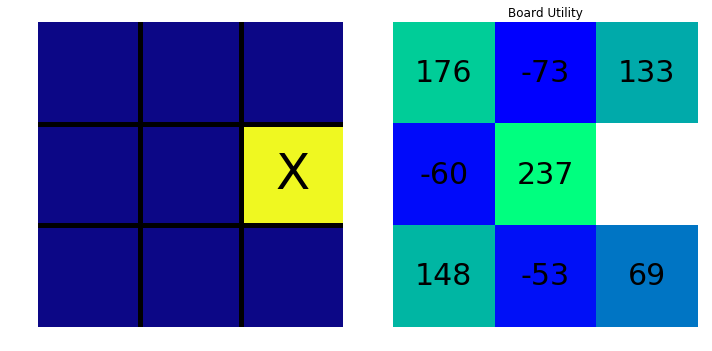

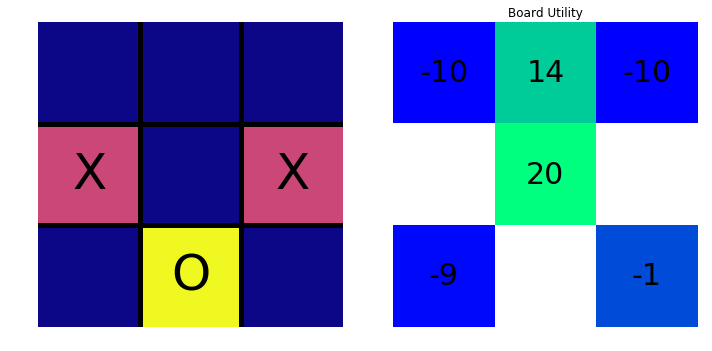

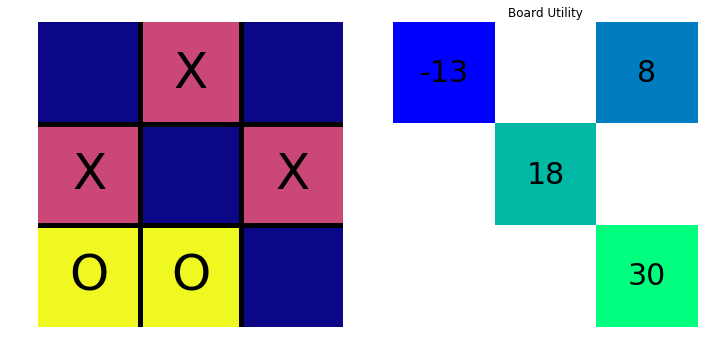

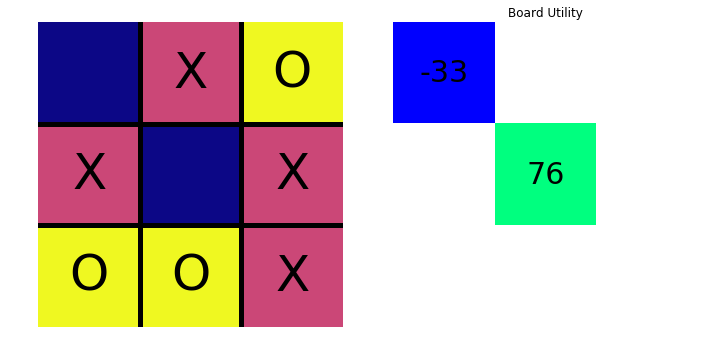

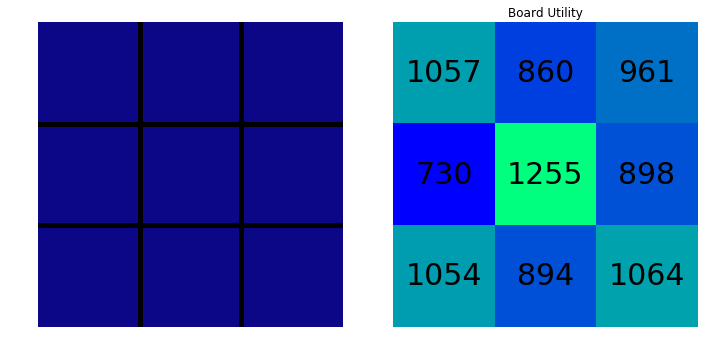

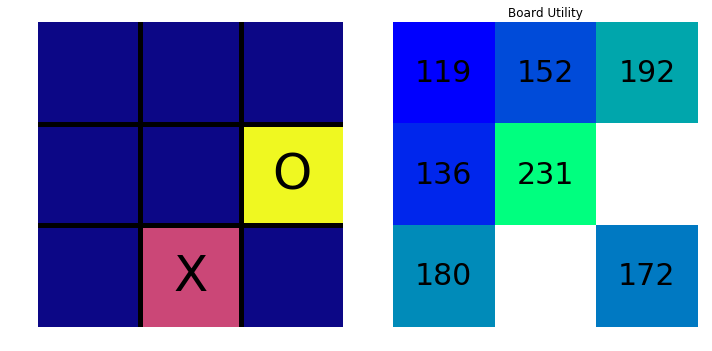

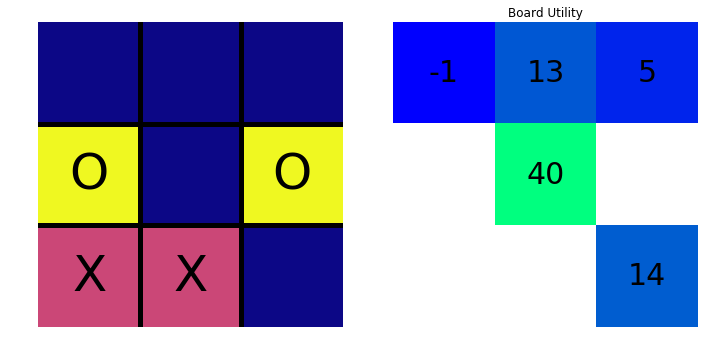

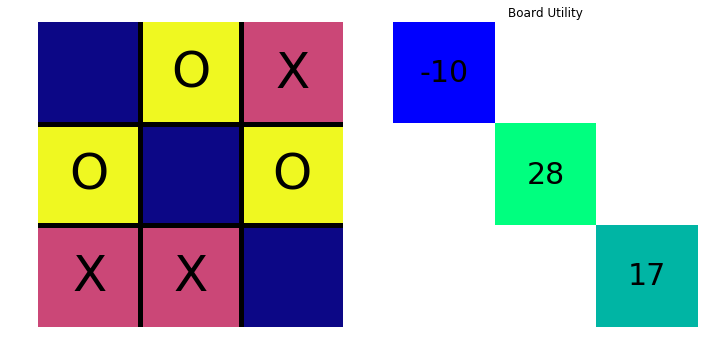

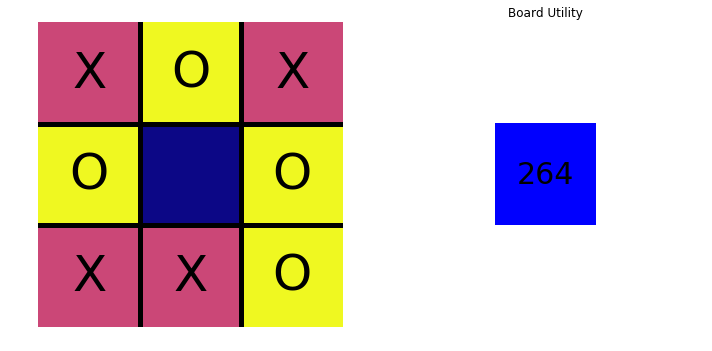

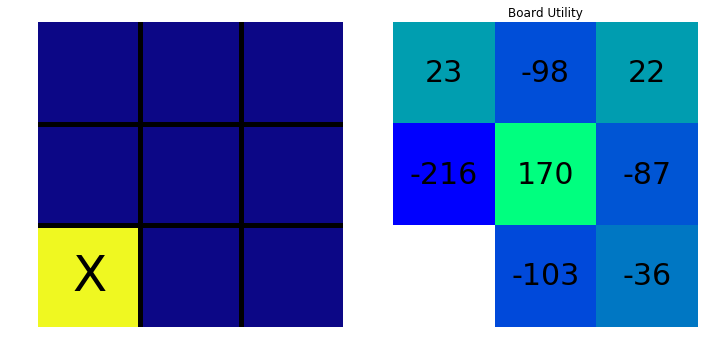

In [7]:
# Control number of boards plotted
board_count = 10

print(f"{board_count} of {len(boards_played[p2].keys())} boards plotted.")
for c_num, (state, utility) in enumerate(boards_played[p2].items(), start=1):
    view_state_and_utility(state, utility)
    if c_num == board_count:
        break